In [19]:
import numpy as np
import cv2
import numpy
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
plt.close('all')

In [20]:
def psnr(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [21]:
test_error = []
train_error = []
x_axis = []

for k in range(2,50):    
    folder = 'faces'
    lst = os.listdir(folder)
    imgs_hr = []
    
    for i in lst:
        img = cv2.imread(folder+"/"+i,0)
        img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
        imgs_hr.append(img)
        
    imgs_hr = np.array(imgs_hr)
    imgs_hr = imgs_hr.astype(float)
    imgs_lr = imgs_hr[:,::2,::2]
    
    h,w = imgs_hr[0].shape
    
    y = imgs_hr.reshape((len(imgs_hr),w*h))/255
    X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255
    imgs_hr = None
    imgs_lr = None
    
    model = KNeighborsRegressor(n_neighbors=k)
    
    print ("Started training Model ",k)
    model.fit(X,y)
    
    Train_error = np.mean(np.square(y - model.predict(X)))/len(y)
    print ("Training  Error with k = "+ str(k)+"  is ",Train_error)
    
    s = 0
    pred1 = model.predict(X)
    for i in range(len(pred1)):
        s = s + psnr(y[i]*255,pred1[i]*255)
    s = s/(i+1)
    print ("Average training PSNR : with K = "+str( k) + ' is '+str( s))
    
    
    #######Test Data####
    
    
    folder = 'test'
    lst = os.listdir(folder)
    imgs_hr = []
    for i in lst:
        img = cv2.imread(folder+"/"+i,0)
        img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
        imgs_hr.append(img)
        
    imgs_hr = np.array(imgs_hr)
    imgs_hr = imgs_hr.astype(float)
    imgs_lr = imgs_hr[:,::2,::2]
    
    y = imgs_hr.reshape((len(imgs_hr),w*h))/255
    X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255
    
    imgs_hr=None
    imgs_lr = None
    
    img_id=0
    pred = model.predict(X[:,:])
    
    test = np.mean(np.square(y - model.predict(X)))
    print ("Testing Error with k = "+ str(k)+"  is ",test)
    
    s = 0
    pred1 = model.predict(X)
    
    for i in range(len(pred1)):
        s = s + psnr(y[i]*255,pred1[i]*255)
    s = s/len(y)
    print ("Average Testing PSNR : with K = "+ str(k) + ' is '+ str(s))
    
    reshaped = pred.reshape((len(pred),h,w))
    y = y.reshape((len(X),h,w))
    
    model = None
    neight = None
    
    test_error.append(test)
    
    x_axis.append(k)
    

('Started training Model ', 2)
('Training  Error with k = 2  is ', 390.20549592464448)
Average training PSNR : with K = 2 is 19.6394958111
('Testing Error with k = 2  is ', 0.042625895664249423)
Average Testing PSNR : with K = 2 is 13.8632148871
('Started training Model ', 3)
('Training  Error with k = 3  is ', 579.1153065231324)
Average training PSNR : with K = 3 is 17.9758564377
('Testing Error with k = 3  is ', 0.040152224916365081)
Average Testing PSNR : with K = 3 is 14.1449805421
('Started training Model ', 4)
('Training  Error with k = 4  is ', 685.61808070934262)
Average training PSNR : with K = 4 is 17.2351019222
('Testing Error with k = 4  is ', 0.038840538844815614)
Average Testing PSNR : with K = 4 is 14.295410163
('Started training Model ', 5)
('Training  Error with k = 5  is ', 756.36439379930778)
Average training PSNR : with K = 5 is 16.813843744
('Testing Error with k = 5  is ', 0.038358319758457979)
Average Testing PSNR : with K = 5 is 14.3462304138
('Started training 

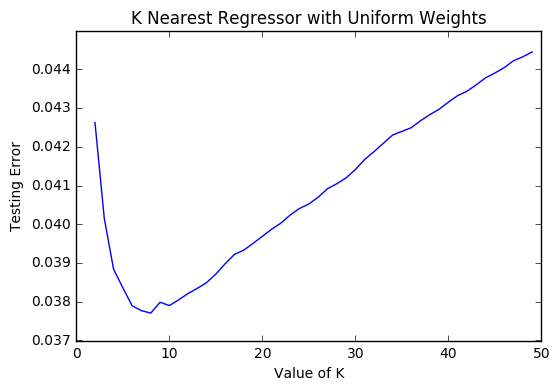

6

In [34]:
plt.close('all')
fig = plt.figure()
plt.plot(x_axis,test_error)
plt.xlabel('Value of K')
plt.ylabel('Testing Error')
plt.title('K Nearest Regressor with Uniform Weights')
plt.show()

test_error.index(min(test_error))

In [30]:
min_k = test_error.index(min(test_error))

folder = 'faces'
lst = os.listdir(folder)
imgs_hr = []

for i in lst:
    img = cv2.imread(folder+"/"+i,0)
    img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
    imgs_hr.append(img)

imgs_hr = np.array(imgs_hr)
imgs_hr = imgs_hr.astype(float)

imgs_lr = imgs_hr[:,::2,::2]

h,w = imgs_hr[0].shape

y = imgs_hr.reshape((len(imgs_hr),w*h))/255
X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255
imgs_hr = None
imgs_lr = None

model = KNeighborsRegressor(n_neighbors=min_k)


model.fit(X,y)

Train_error = np.mean(np.square(y - model.predict(X)))/len(y)
print ("Training  Error with k = "+ str(min_k)+"  is ",Train_error)

s = 0
pred1 = model.predict(X)
for i in range(len(pred1)):
    s = s + psnr(y[i]*255,pred1[i]*255)
s = s/(i+1)
print ("Average training PSNR : with K = "+str( min_k) + ' is '+str( s))



('Training  Error with k = 6  is ', 0.00024462223718610691)
Average training PSNR : with K = 6 is 16.5121975183


In [31]:
folder = 'test'

lst = os.listdir(folder)

imgs_hr = []
for i in lst:
    img = cv2.imread(folder+"/"+i,0)
    img = cv2.resize(img,(0,0), fx=0.25, fy=0.25)
    imgs_hr.append(img)
    
imgs_hr = np.array(imgs_hr)
imgs_hr = imgs_hr.astype(float)
imgs_lr = imgs_hr[:,::2,::2]


y = imgs_hr.reshape((len(imgs_hr),w*h))/255
X = imgs_lr.reshape((len(imgs_lr),int(h*w*.25)))/255

#X[0,1] = .99
#X[0,100] = .6

imgs_hr=None
imgs_lr = None
img_id=0


In [32]:
#Check the Testing Errors

pred = model.predict(X[:,:])



reshaped = pred.reshape((len(pred),h,w))


test = np.mean(np.square(y - model.predict(X)))

print ("Testing Error is ",test)



s = 0

pred1 = model.predict(X)

for i in range(len(pred1)):
    s = s + psnr(y[i]*255,pred1[i]*255)
    
s = s/len(y)

print ("Average Testing PSNR : ", s)



y = y.reshape((len(X),h,w))






('Testing Error is ', 0.037895915764608899)
('Average Testing PSNR : ', 14.407811217842498)


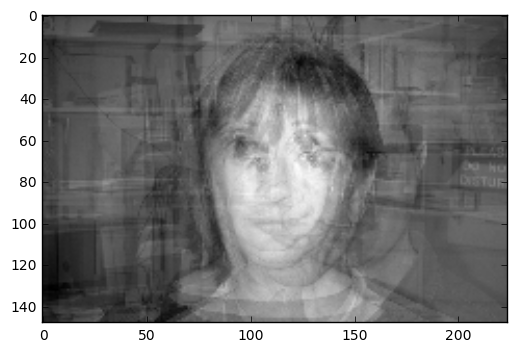

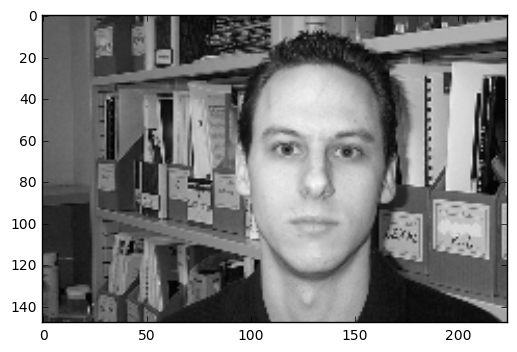

(148, 224)

In [33]:
plt.close('all')

figure = plt.figure()

plt.imshow(reshaped[img_id],cmap='gray')

figure = plt.figure()

plt.imshow(y[img_id],cmap='gray')



plt.show()





reshaped[img_id].shape